In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = np.load('data.npy').reshape(1, -1).ravel()
weightsLayer1 = np.array([np.random.normal(size=5), 
                         np.random.normal(size=5)]).T
biasesLayer1 = np.array(np.random.normal(size=5))
weightsLayer2 = np.array(np.random.normal(size=5)).T
biasLayer2 = np.random.normal()

learningRate = 0.05
errorThreshold = 0.00002

In [18]:
def logSigmoid(array):
    for i in range (0, len(array)):
        array[i] = 1 / (1 + np.exp(-array[i]))

In [19]:
meanSquaredError = 1
iterationError = np.zeros(168)
mse_iterations = []

while meanSquaredError > errorThreshold:
    for index in range(2, 170):
        p = np.array([data[index-1], data[index-2]])
        t = data[index]
        # Step 1: Forward propagate
        netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
        logSigmoid(netInputFirstLayer)
        outputFirstLayer = netInputFirstLayer

        netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
        error = t - netOutput
        iterationError[index-2] = error.ravel()[0]
        # Step 2: Backpropagate the error
        sensitivitySecondLayer = -2 * error
        functionDerivativeMatrix = np.zeros([len(outputFirstLayer),len(outputFirstLayer)])
        for i in range(0, len(outputFirstLayer)):
            functionDerivativeMatrix[i][i] = outputFirstLayer.ravel()[i] * (1 - outputFirstLayer.ravel()[i])
        sensitivityFirstLayer = (sensitivitySecondLayer) * (np.dot(weightsLayer2, functionDerivativeMatrix))
        # Step 3: Update the weights and biases
        weightsLayer1 = weightsLayer1 - learningRate * np.dot(sensitivityFirstLayer.reshape(5,1), p.reshape(1,2))
        biasesLayer1 = biasesLayer1 - learningRate * sensitivityFirstLayer
        weightsLayer2 = weightsLayer2 - learningRate * sensitivitySecondLayer * outputFirstLayer.T
        biasLayer2 = biasLayer2 - learningRate * sensitivitySecondLayer
    
    meanSquaredError = np.mean(iterationError.flatten() ** 2)
    mse_iterations.append(meanSquaredError)
    

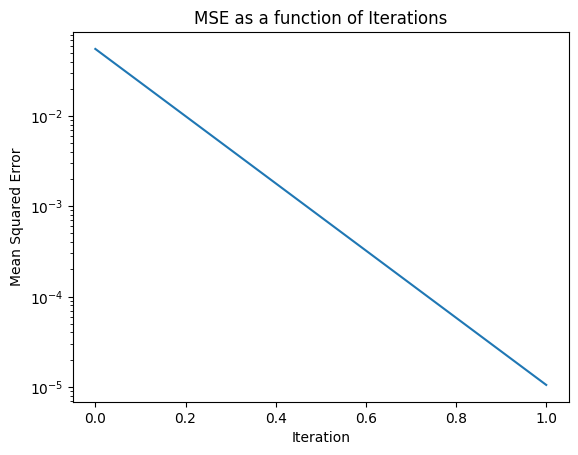

In [20]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [21]:
p = np.array([data[1], data[2]])
t = data[3]
netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
logSigmoid(netInputFirstLayer)
outputFirstLayer = netInputFirstLayer
netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function

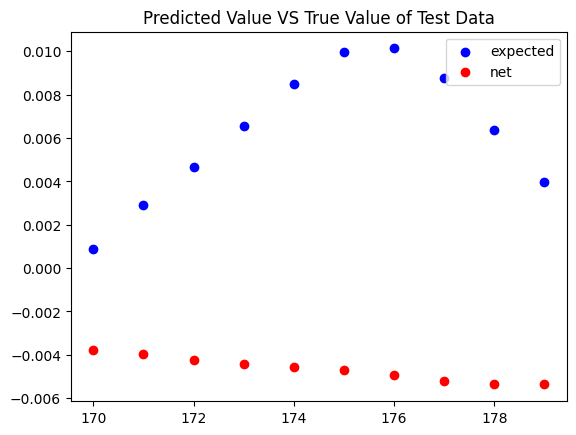

In [22]:
net_output = np.zeros(10)
expected_output = np.zeros(10)
for index in range(170, 180):
    p = np.array([data[index-1], data[index-2]])
    t = data[index]
    netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
    logSigmoid(netInputFirstLayer)
    outputFirstLayer = netInputFirstLayer

    netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
    net_output[index-170] = netOutput[0][0]
    expected_output[index-170] = t

x = [170,171,172,173,174,175,176,177,178,179]

plt.title("Predicted Value VS True Value of Test Data")

plt.scatter(x, expected_output, label='expected', color='blue')
plt.scatter(x, net_output, label='net', color='red')
plt.legend()
plt.show()